# Basic statistics

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep=';')

## Data exploration

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
for i in data.keys():
    print(i, " has ", len(data[i].unique()), " unique values")

fixed acidity  has  96  unique values
volatile acidity  has  143  unique values
citric acid  has  80  unique values
residual sugar  has  91  unique values
chlorides  has  153  unique values
free sulfur dioxide  has  60  unique values
total sulfur dioxide  has  144  unique values
density  has  436  unique values
pH  has  89  unique values
sulphates  has  96  unique values
alcohol  has  65  unique values
quality  has  6  unique values


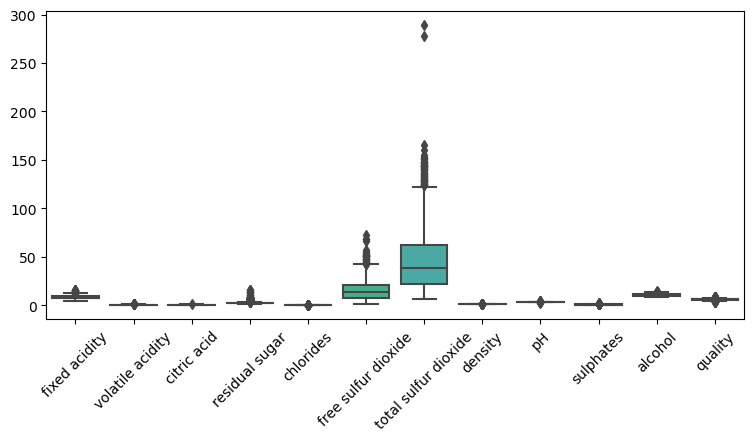

In [6]:
fig, ax = plt.subplots(1, figsize=(9,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [7]:
# removing free sulfur dioxide outliers

data = data[data['total sulfur dioxide']<200]

<Axes: xlabel='residual sugar', ylabel='alcohol'>

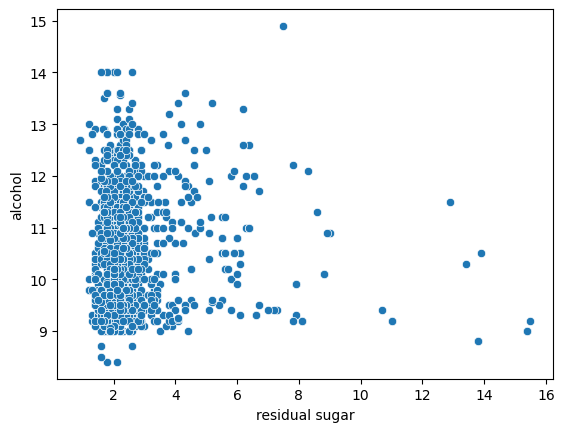

In [8]:
# visual data exploration

sns.scatterplot(x=data['residual sugar'], y=data['alcohol'])

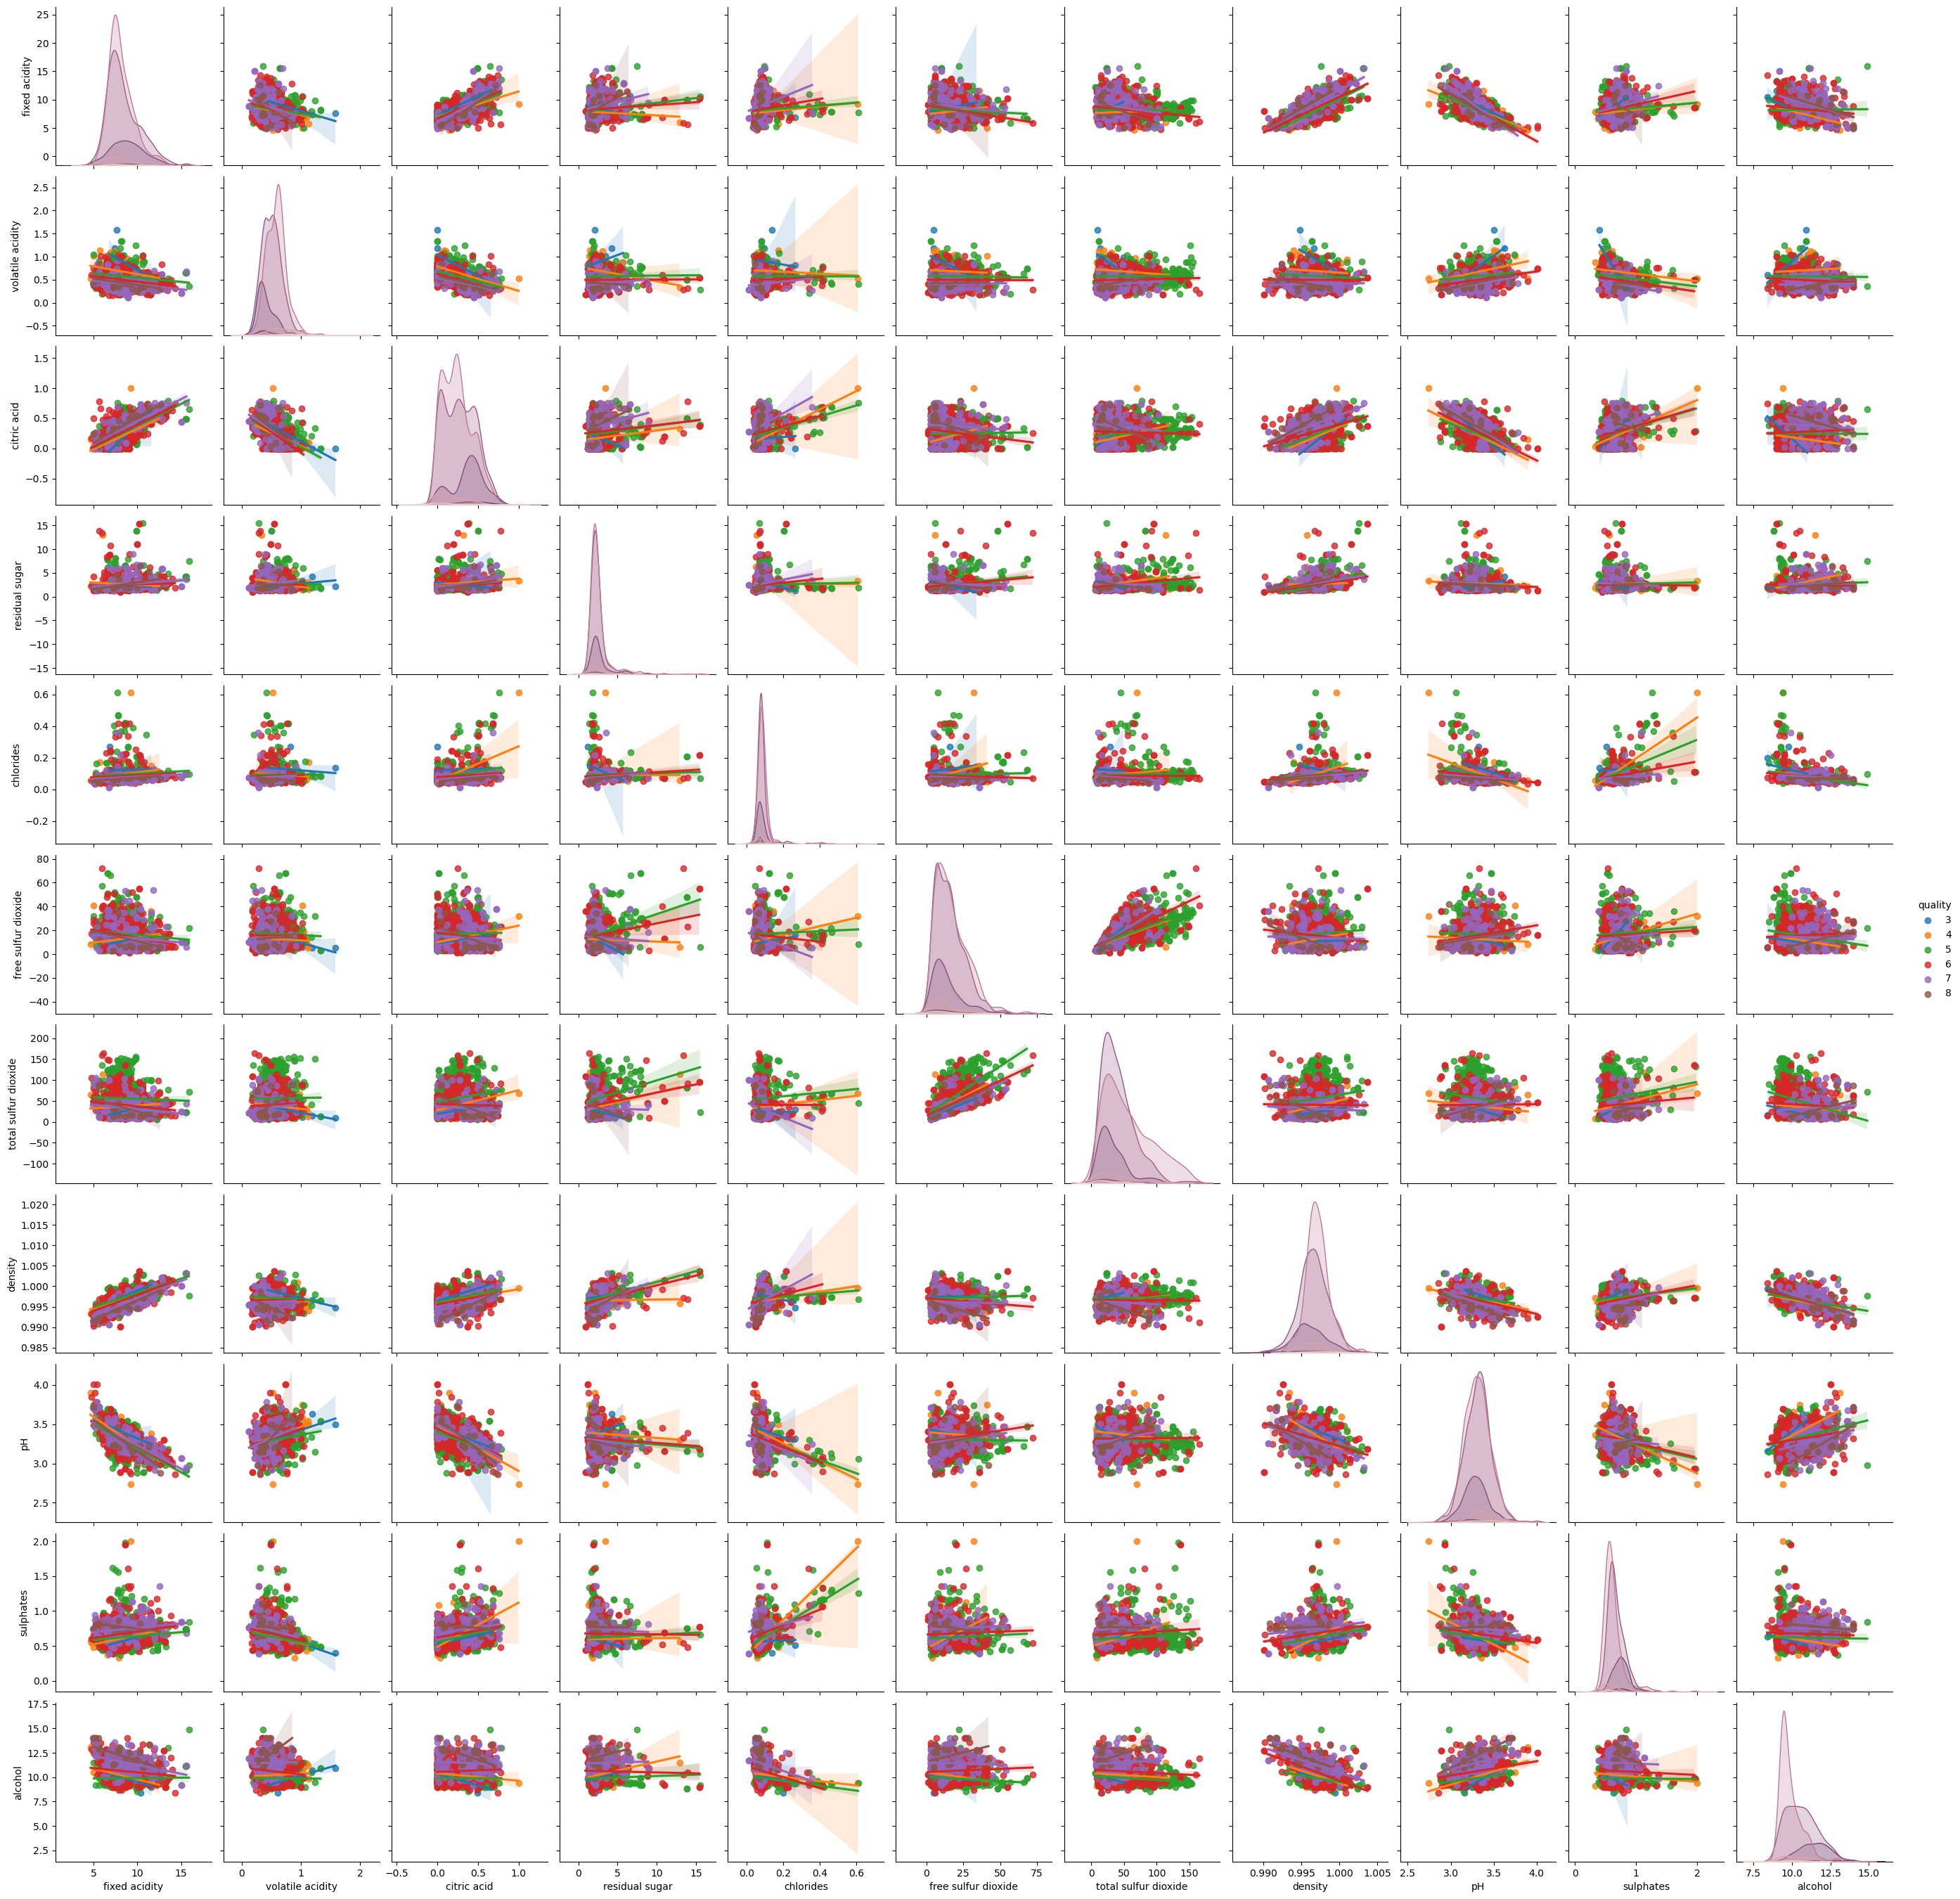

In [48]:
sns.pairplot(data=data, kind='reg',hue='quality')

## T-test

In [14]:
x = data['volatile acidity'][data['quality']==3]
y = data['volatile acidity'][data['quality']==8]

In [32]:
t_test = stats.ttest_ind(x,y)

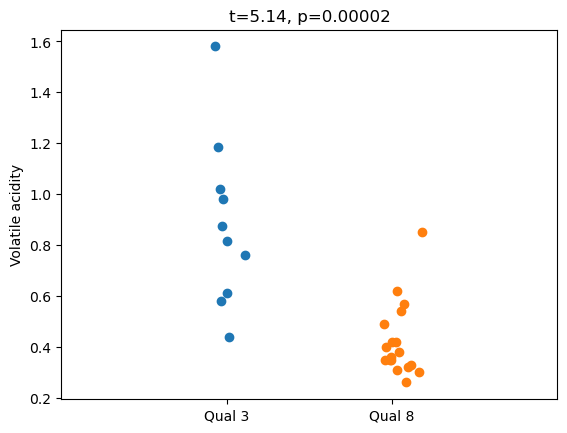

In [37]:
plt.plot(np.random.randn(len(x))/30, x, 'o',
         np.random.randn(len(y))/30+0.5, y, 'o')
plt.xlim([-0.5,1])
plt.xticks([0, 0.5], labels=['Qual 3', 'Qual 8'])
plt.ylabel('Volatile acidity')
plt.title(f't={t_test[0]:.2f}, p={t_test[1]:.5f}')
plt.show()

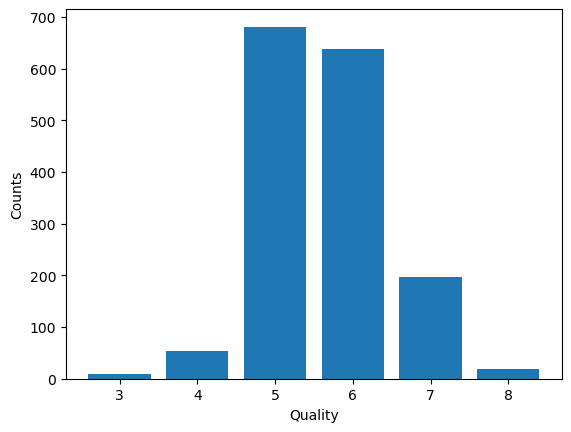

In [43]:
counts = data['quality'].value_counts()
plt.bar(list(counts.keys()), counts)
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.show()

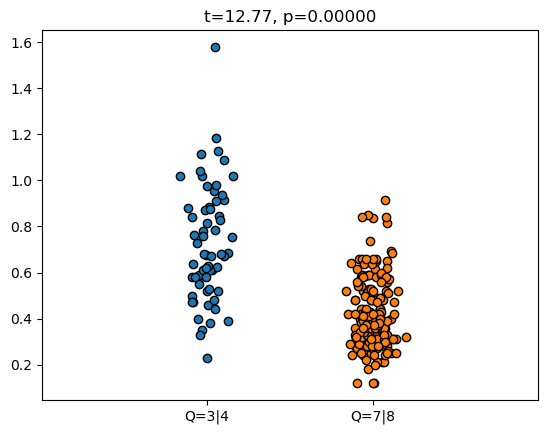

In [52]:
x = data['volatile acidity'][(data['quality']==3) | (data['quality']==4)]
y = data['volatile acidity'][(data['quality']==7) | (data['quality']==8)]

t_test = stats.ttest_ind(x,y)

plt.plot(np.random.randn(len(x))/30, x, 'o',
         np.random.randn(len(y))/30+0.5, y, 'o',
         markeredgecolor='k')
plt.xlim([-0.5, 1])
plt.xticks([0, 0.5], labels=['Q=3|4', 'Q=7|8'])
plt.title(f't={t_test[0]:.2f}, p={t_test[1]:.5f}')
plt.show()


## Multiple regression

In [61]:
dep_var = data['quality']
ind_vars = data.drop(labels='quality', axis=1)
ind_vars = sm.add_constant(ind_vars)

In [62]:
model = sm.OLS(dep_var, ind_vars).fit()

In [63]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          1.30e-145
Time:                        14:20:58   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

In [75]:
sig_cols = list(model.pvalues[model.pvalues<.05].keys())
[print(i) for i in sig_cols];

volatile acidity
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol


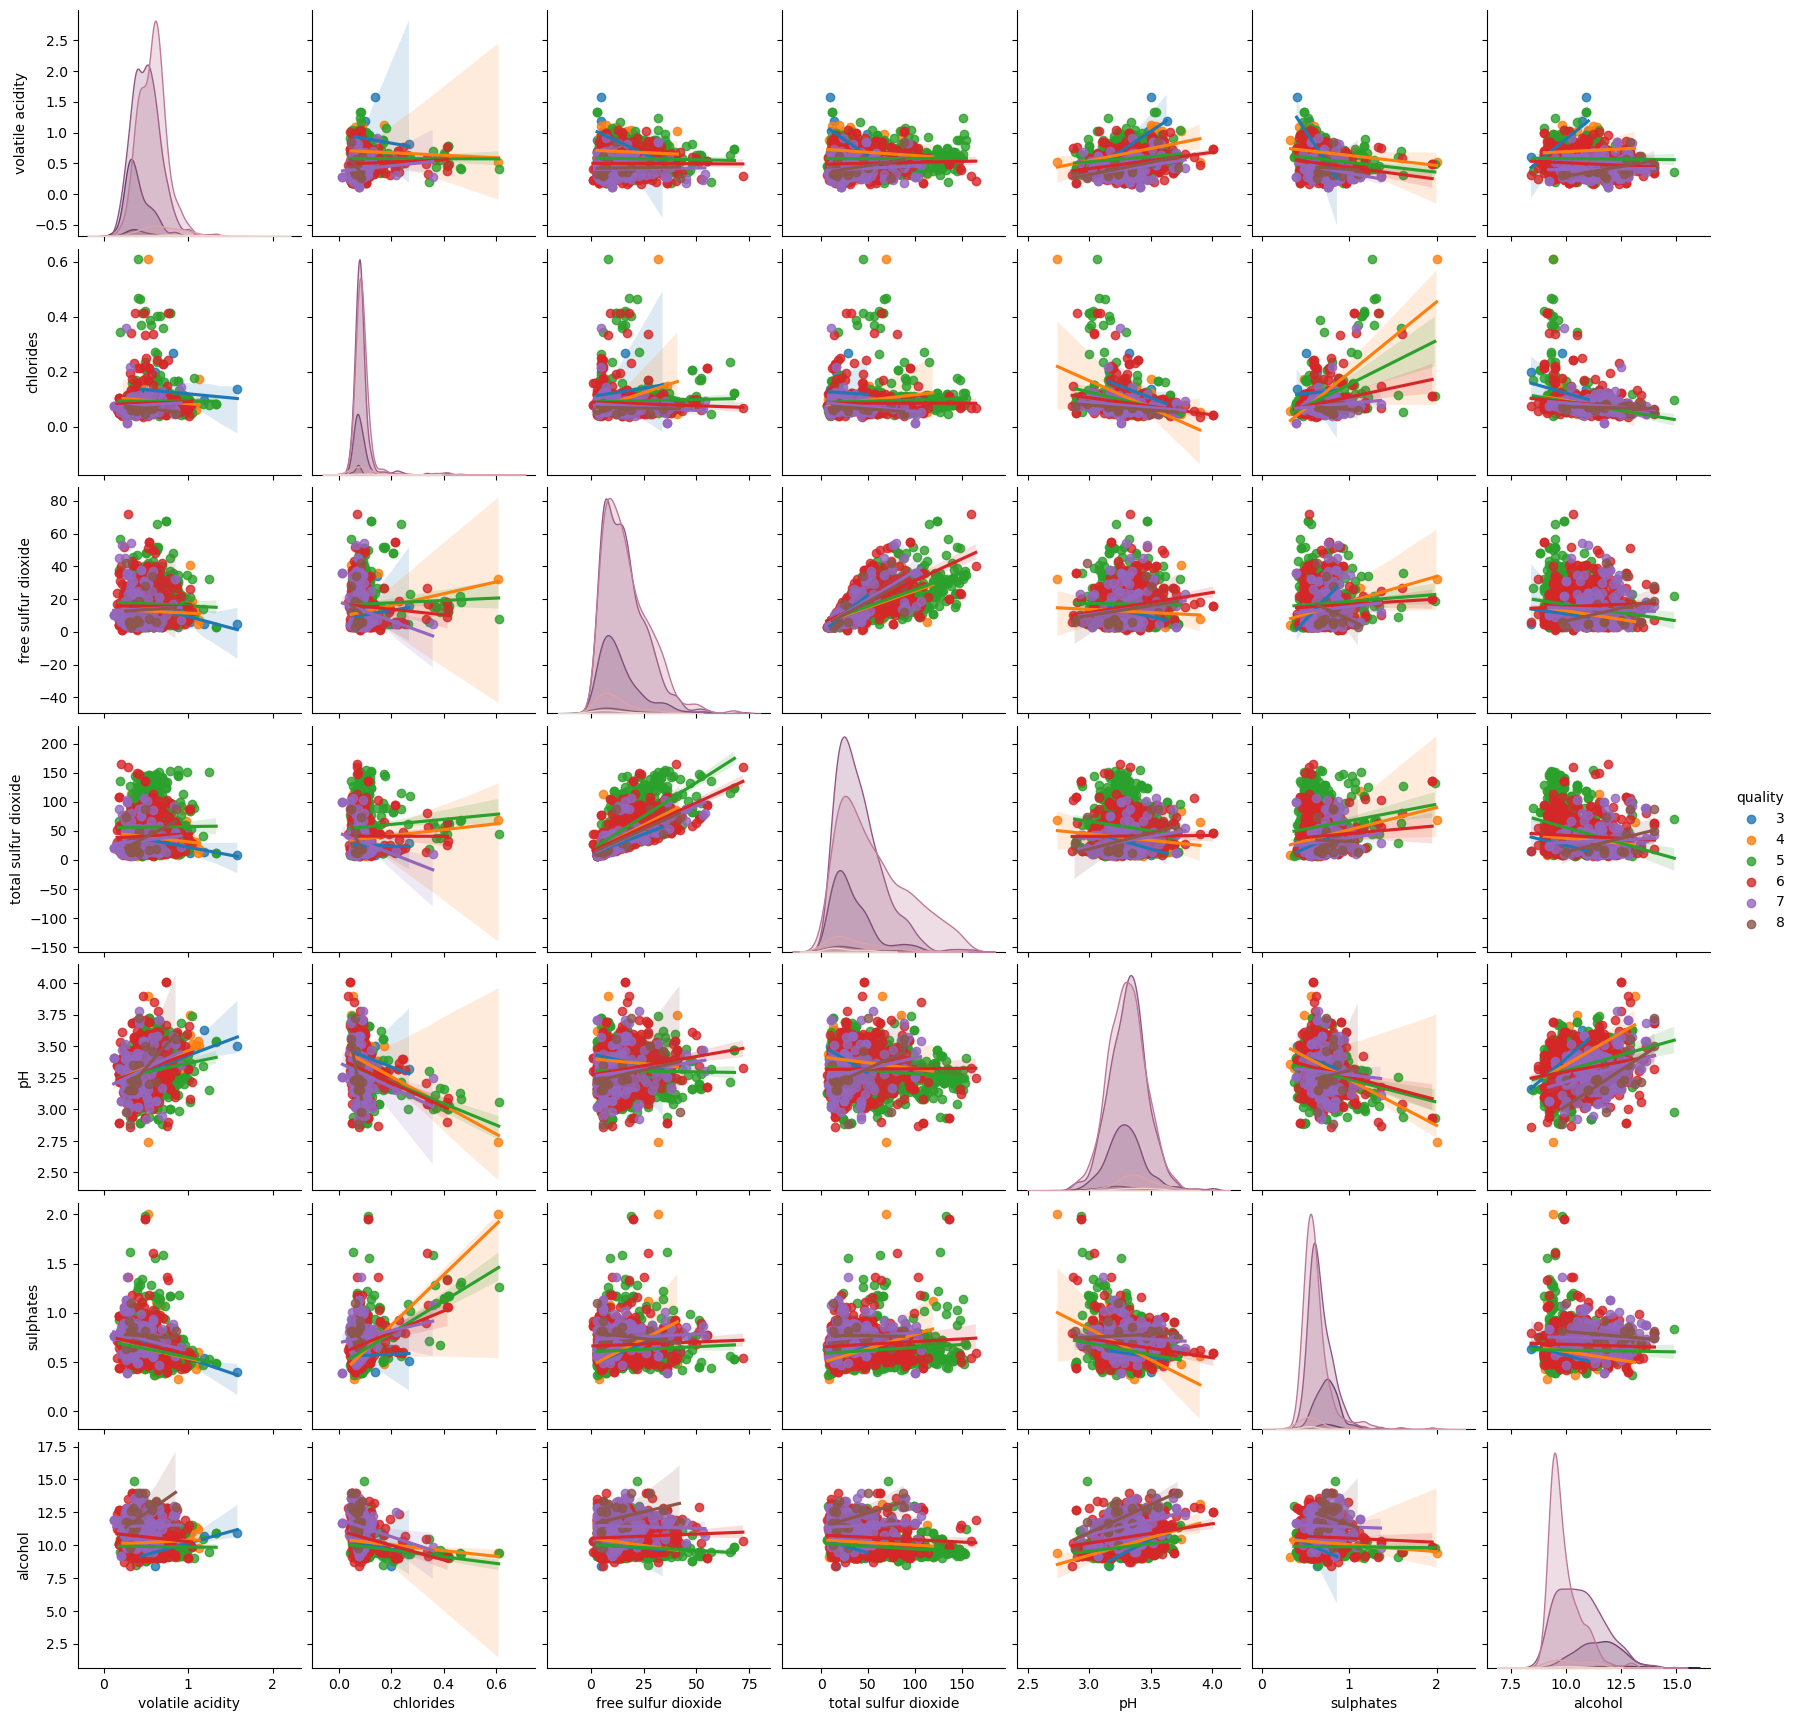

In [77]:
sig_cols.append('quality')
sns.pairplot(data[sig_cols], kind='reg', hue='quality')

## Logistic Regression

In [95]:
binthresh = np.mean(data['quality'])
data['binquality'] = data['quality'] > binthresh

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [97]:
Xcols = []
Ycols = ['quality', 'binquality']

for key in data.keys():
    if key not in Ycols:
        Xcols.append(key)



In [98]:
model = sm.Logit(data['binquality'], data[Xcols])
result = model.fit(method="newton")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             binquality   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           10
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  0.2525
Time:                        14:42:24   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                2.601e-113
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1020      0.063      1.609      0.108      -0.022       0.226

In [109]:
sig_colsL = list(result.pvalues[result.pvalues<0.5].keys())
print("Significant predictiors for the logistic regression:")
[print("  -" + i) for i in sig_colsL];

print("\nSignificant predictiors for the standard regression:")
[print("  -" + i) for i in sig_cols[:-1]];

Significant predictiors for the logistic regression:
  -fixed acidity
  -volatile acidity
  -citric acid
  -chlorides
  -free sulfur dioxide
  -total sulfur dioxide
  -density
  -pH
  -sulphates
  -alcohol

Significant predictiors for the standard regression:
  -volatile acidity
  -chlorides
  -free sulfur dioxide
  -total sulfur dioxide
  -pH
  -sulphates
  -alcohol
